In [2]:
import random as rd
import pandas as pd
import math

Variant = 21
rd.seed(Variant)
Str1 = 'qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
N = rd.randint(20,40)
s1 = ''
for i in range(N):
    s1 += Str1[rd.randint(0, len(Str1)-1)]
D = '!@#$%&*+:;|'[rd.randint(0,10)]
N1 = rd.randint(3,30)
N2 = int(N1 * (N1 + 1) / 2)
if (int(N2/N1) - math.floor(N2/N1)) == 0:
    M = int(N2 / N1)
    K = int(N2 / M)
else:
    M = int(N2 / (N1 + 1))
    K = int(N2 / M)
N4 = rd.randint(123432, 5645634534)
Data  = pd.DataFrame({'Задание':[1,2,3,4,5],'Параметры':['S='+s1,[D, 'N='+str(N2), 
                    'M ='+str(M), 'K = '+str(K)],'-','N='+str(N4),'-']})
Data

,Задание,Параметры
0,1,S=QLQGaThNTMUkUIfNqqbSWtpNV
1,2,"[$, N=55, M =5, K = 11]"
2,3,-
3,4,N=2980480801
4,5,-


Задание №1

In [ ]:
format ELF64

public _start
public exit
public display_char

section '.data'
  text db 'QLQGaThNTMUkUIfNqqbSWtpNV'

section '.bss' writable
  buffer db 1

section '.text' executable
  _start:
    mov rbx, 25       

  loop_label:
    mov dl, [text+rbx] 
    push rbx          
    call display_char 
    pop rbx           
    dec rbx           
    cmp rbx, -1       
    jne loop_label    

    call exit  

display_char:
  push rdx           
  mov eax, 1         
  mov edi, 1         
  mov [buffer], dl   
  mov rsi, buffer    
  mov edx, 1         
  syscall            
  pop rdx            
  ret                

exit:
  mov eax, 60        
  xor edi, edi       
  syscall            

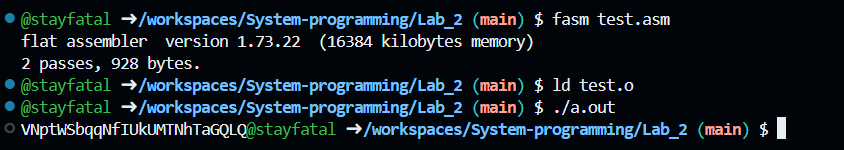

Задание №2

In [ ]:
format ELF64

public _start
public exit
public display_char

section '.bss' writable
  width db 5 dup ('$')
  height db 11 dup (0xA)
  buffer db 1

section '.text' executable
  _start:
    xor rsi, rsi
    .iter1:
      xor rdi, rdi  
      .iter2:
        mov al, [width+rdi]
        push rdi
        call display_char
        pop rdi
        inc rdi
        cmp rdi,5
        jne .iter2

      mov al, [height+rsi]
      push rsi
      call display_char
      pop rsi

      inc rsi
      cmp rsi,11
      jne .iter1
    call exit

display_char:
  push rax           
  mov [buffer], al    
  mov eax, 4         
  mov ebx, 1         
  mov ecx, buffer     
  mov edx, 1        
  int 0x80           
  pop rax            
  ret

exit:
  mov eax, 1         
  mov ebx, 0         
  int 0x80

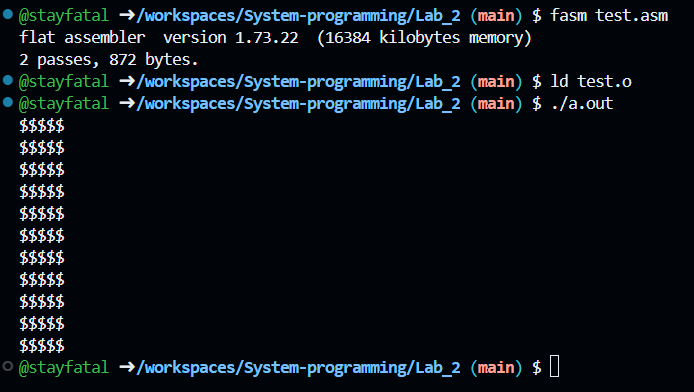

Задание №3

In [ ]:
format ELF64

public _start
public exit
public display_char

section '.bss' writable
  width db 11 dup (':')          
  height db 11 dup (0xA)  
  buffer db 1
  counter dq 0                

section '.text' executable
  _start:
    xor rsi, rsi    

    .iter1:              
      xor rdi, rdi  

      mov rbx, [counter]
      inc rbx
      mov [counter], rbx  

      .iter2:
        mov al, [width + rdi]   
        call display_char        
        inc rdi                
        cmp rdi, [counter]           
        jne .iter2             

      ; вывод новой строки
      mov al, [height + rsi]    
      call display_char            

      inc rsi                  
      cmp rsi, 11                
      jne .iter1             
    call exit                  

display_char:
  push rax
  mov [buffer], al
  mov eax, 4
  mov ebx, 1
  mov ecx, buffer
  mov edx, 1
  int 0x80
  pop rax
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80

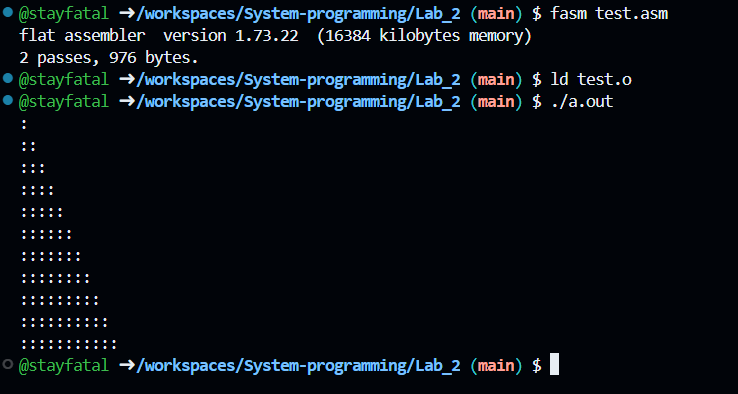

Задание №4

In [ ]:
format ELF64

public _start
public exit
public display_char

section '.bss' writable
  num dq 2980480801    
  sum dq 0            
  ten dq 10                 
  buffer db 1         

section '.text' executable
  _start:
    mov rax, [num]      
    xor rbx, rbx            

    .sum_loop:
      xor rdx, rdx           
      div qword [ten]         
      add rbx, rdx            
      cmp rax, 0              
      jne .sum_loop           

    mov [sum], rbx       

    call display_char        

    mov eax, 60             
    xor edi, edi        
    call exit                  

display_char:
    mov rax, [sum]       
    xor rbx, rbx            

    cmp rax, 9
    jle .single_digit       

    mov rcx, 10             
    .loop:
        xor rdx, rdx           
        div rcx                  
        push rdx                
        inc rbx                
        test rax, rax           
        jnz .loop                

    .print_loop:
        pop rax                 
        add rax, '0'             
        mov [buffer], al         

        mov eax, 1               
        mov edi, 1               
        mov rsi, buffer           
        mov edx, 1             
        syscall

        dec rbx                 
        jnz .print_loop      

        ret

    .single_digit:
        add rax, '0'            
        mov [buffer], al        

        mov eax, 1              
        mov edi, 1             
        mov rsi, buffer        
        mov edx, 1              
        syscall
        ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80

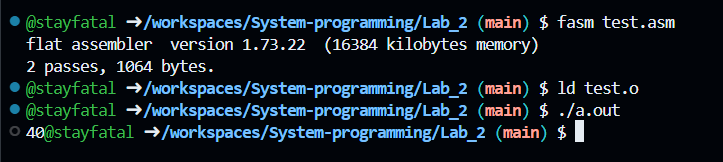

Задание №5

In [ ]:
# include <stdio.h>

int main() {
    long num = 5447175926;
    
    int sum = 0;

    while (num > 0) {
        sum += num % 10;
        num /= 10;      
    }

    printf("%d\n", sum);
    return 0;
}

Сокращенный код на C

In [ ]:
# include <stdio.h>

int main() {
    long num = 5447175926;
    
    int sum = 0;

    for(;num>0;num/=10)sum += num % 10;

    printf("%d\n", sum);
    return 0;
}

Сокращенный код на ассемблере

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  num dq 2980480801   
  sum dq 0            
  ten dq 10                  
  buffer db 1         

section '.text' executable
  _start:
    mov rax, [num]      
    xor rbx, rbx            
    .sum_loop:
      xor rdx, rdx           
      div qword [ten]         
      add rbx, rdx            
      test rax, rax              
      jnz .sum_loop        
    mov [sum], rbx        
    call print_symb         
    mov eax, 60              
    xor edi, edi        
    syscall                  

print_symb:
    mov rax, [sum]       
    mov rdi, 10             
    xor rbx, rbx             
    cmp rax, 0
    je .print_zero
    .loop:
        xor rdx, rdx           
        div rdi               
        push rdx                
        inc rbx                
        test rax, rax           
        jnz .loop                 
    .print_loop:
        pop rax                  
        add rax, '0'             
        mov [buffer], al         
        mov eax, 1              
        mov edi, 1              
        mov rsi, buffer         
        mov edx, 1              
        syscall
        dec rbx                 
        jnz .print_loop       
    ret
    .print_zero:
        mov byte [buffer], '0'
        mov eax, 1              
        mov edi, 1              
        mov rsi, buffer         
        mov edx, 1              
        syscall
        ret

exit:
  mov eax, 60
  xor edi, edi
  syscall